In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from scipy.stats import skew
import warnings 
warnings.filterwarnings('ignore')

In [2]:
tem=pd.read_csv('temperature_data.csv')

In [3]:
tem.sample(10)

ambient   coolant       u_d       u_q  motor_speed    torque  \
406528  0.312030 -0.130256  2.213791 -0.551824     0.420439 -1.983957   
24348   0.305726 -1.029161 -1.026025  0.926484     1.212477  0.357097   
416703  0.679492  0.620870  0.784197 -0.989751    -0.906983 -2.277525   
849706  1.551949  0.573083 -1.623195 -0.785295     0.882920  0.982552   
851301  1.529032  0.554595  0.346065 -1.257112    -1.222429 -0.255640   
544341  2.049882  1.747403  0.833624  1.651597     0.380864 -0.554897   
798712 -1.006420 -0.440007  0.321217 -1.324355    -1.222421 -0.255639   
578841  0.688609 -0.782758 -0.981463 -0.626828    -0.608277  2.715740   
995687 -0.121277 -0.698334  0.343337 -1.316956    -1.222432 -0.255640   
368610 -0.369132  0.331187 -1.433449  0.005549     1.599758  0.506275   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
406528 -1.602907 -1.816294  0.066222     0.023119      0.256629   
24348  -0.834326  0.323054 -0.084890    -0.734949     -0.428327   
416703 -0.173949 -2.363859  0.357360     0.904605      1.037071   
849706 -1.990880  0.794088  1.516839     1.324301      1.769880   
851301  1.029141 -0.245718  1.049008     0.126403     -0.208590   
544341  0.891893 -0.594038  1.118333     1.498662      1.077324   
798712  1.029137 -0.245735 -1.272115    -0.551826     -0.678536   
578841 -1.344485  2.743952 -0.290917    -0.552757     -0.296267   
995687  1.029141 -0.245722 -0.863074    -0.878474     -0.901929   
368610 -1.555330  0.409414  0.856502     0.255553      0.333768   

        stator_winding  profile_id  
406528        0.553752          50  
24348        -0.261769           4  
416703        1.126678          51  
849706        2.066127          74  
851301       -0.465285          74  
544341        0.564756          58  
798712       -0.704264          71  
578841        0.025129          60  
995687       -0.878395          72  
368610        0.360737          47

In [4]:
tem.shape

(998070, 13)

In [5]:
tem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [6]:
tem.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

In [7]:
tem.isna().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [8]:
tem.duplicated().sum()

0

In [9]:
tem.describe()

ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.003905       0.004723       0.004780      -0.005690   
std         0.993127       1.002423       0.997878       1.002330   
min        -8.573954      -1.429349      -1.655373      -1.861463   
25%        -0.599385      -1.037925      -0.826359      -0.927390   
50%         0.266157      -0.177187       0.267542      -0.099818   
75%         0.686675       0.650709       0.358491       0.852625   
max         2.967117       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.006336      -0.003333       0.006043      -0.003194   
std         1.001229       0.997907       0.998994       0.997912   
min        -1.371529      -3.345953      -3.245874      -3.341639   
25%        -0.951892      -0.266917      -0.756296      -0.257269   
50%        -0.140246      -0.187246       0.213935      -0.190076   
75%         0.853584       0.547171       1.013975       0.499260   
max         2.024164       3.016971       1.060937       2.914185   

                  pm    stator_yoke   stator_tooth  stator_winding  \
count  998070.000000  998070.000000  998070.000000   998070.000000   
mean       -0.004396       0.000609      -0.002208       -0.003935   
std         0.995686       1.001049       0.999597        0.998343   
min        -2.631991      -1.834688      -2.066143       -2.019973   
25%        -0.672308      -0.747265      -0.761951       -0.725622   
50%         0.094367      -0.057226       0.005085        0.006536   
75%         0.680691       0.697344       0.772239        0.725660   
max         2.917456       2.449158       2.326668        2.653781   

          profile_id  
count  998070.000000  
mean       50.732001  
std        22.073125  
min         4.000000  
25%        32.000000  
50%        56.000000  
75%        68.000000  
max        81.000000

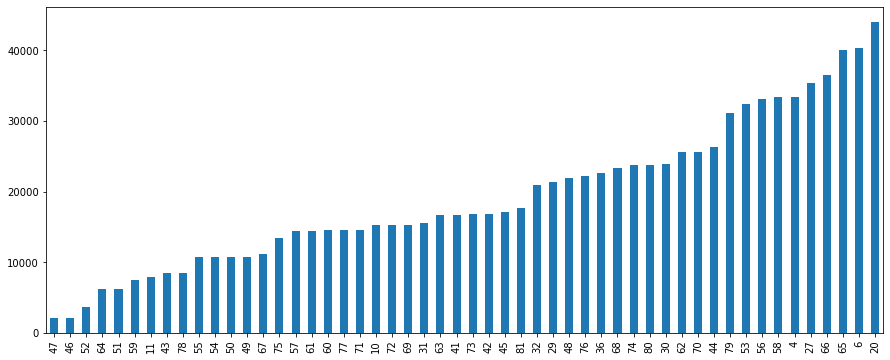

In [10]:
plt.figure(figsize=(15,6))
tem['profile_id'].value_counts().sort_values().plot(kind = 'bar');

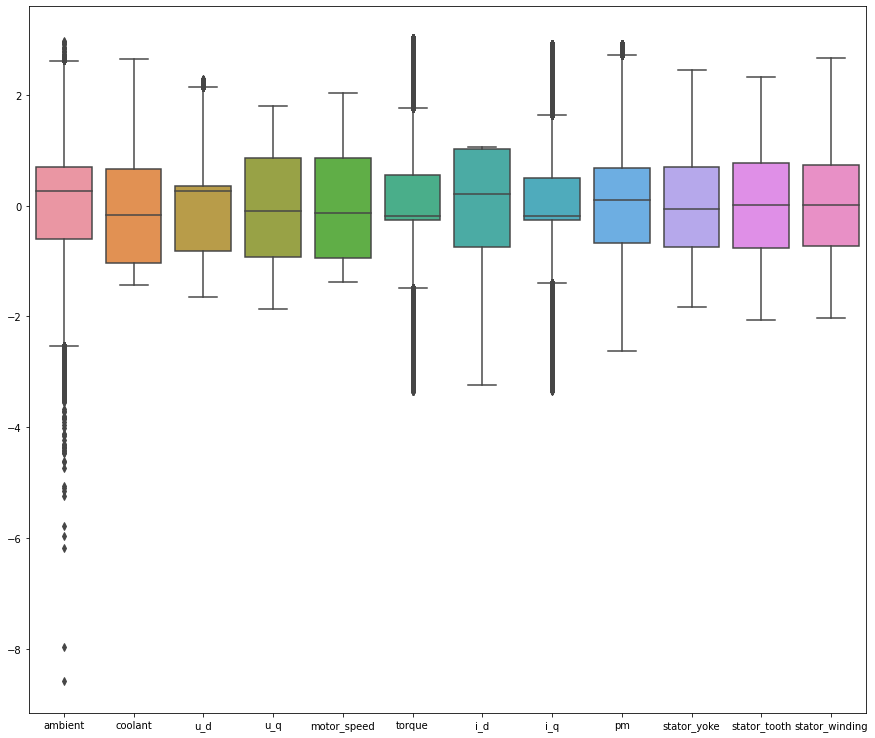

In [11]:
plt.figure(figsize = (15, 13))
sns.boxplot(data = tem[tem.columns[:12]]);

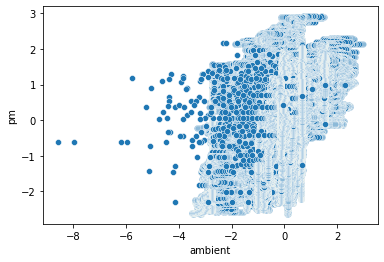

In [12]:
sns.scatterplot(tem['ambient'],tem['pm']);

In [13]:
# for col in tem:
#     print(col)
#     print("skewness",skew(tem[col]))
#     print(kurtosis(tem[col]))
    
#     plt.figure()
#     sns.distplot(tem[col])
#     plt.show();

ambient  :
Skew :  -0.8489138249162917  : 
Kurtosis :  0.822426565610952



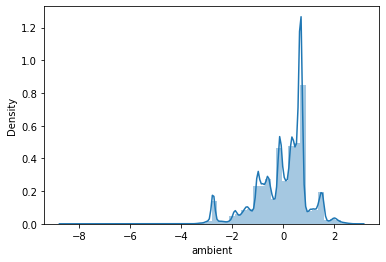

coolant  :
Skew :  0.6282471402211814  : 
Kurtosis :  -0.7599463836890359



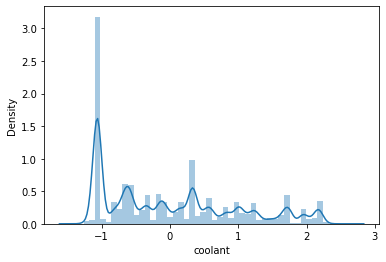

u_d  :
Skew :  0.19464403446801343  : 
Kurtosis :  -0.5228583948458345



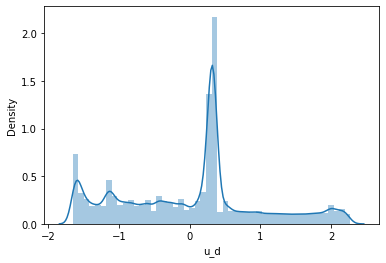

u_q  :
Skew :  0.19988508399235655  : 
Kurtosis :  -1.271315718489302



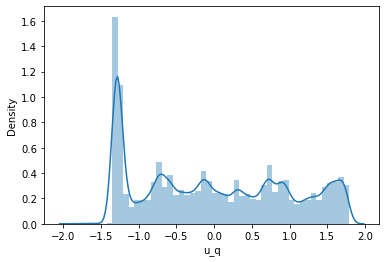

motor_speed  :
Skew :  0.3333048472645522  : 
Kurtosis :  -1.1669369999151742



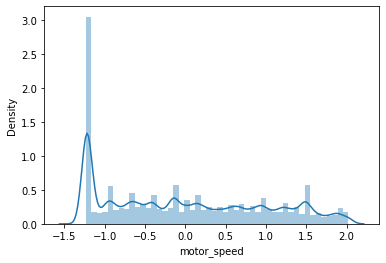

torque  :
Skew :  -0.042660488385365035  : 
Kurtosis :  0.7793178684855206



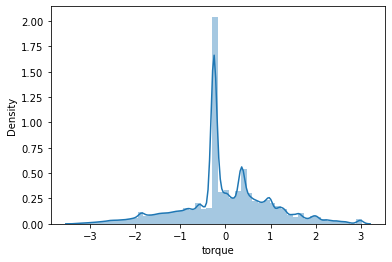

i_d  :
Skew :  -0.62257797275636  : 
Kurtosis :  -0.754099941976742



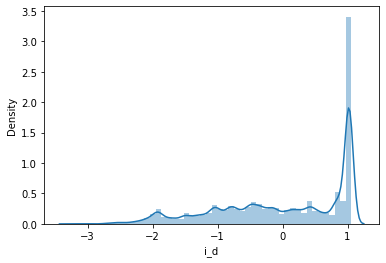

i_q  :
Skew :  -0.07570538427941409  : 
Kurtosis :  0.7849738434370379



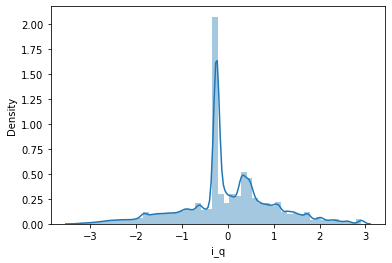

pm  :
Skew :  -0.2329033950928521  : 
Kurtosis :  -0.3492131725408121



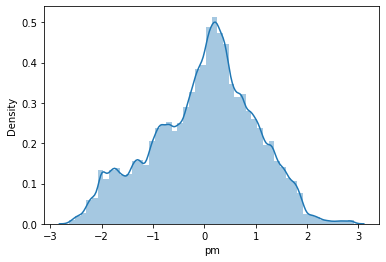

stator_yoke  :
Skew :  0.2572973686790802  : 
Kurtosis :  -0.7289625925727061



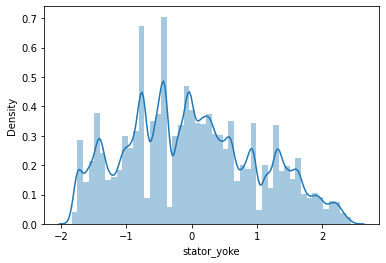

stator_tooth  :
Skew :  -0.0615332410896644  : 
Kurtosis :  -0.7799869810017213



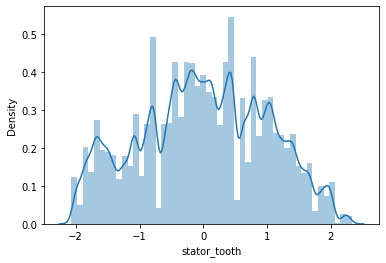

stator_winding  :
Skew :  -0.02805511318661168  : 
Kurtosis :  -0.7284159974661613



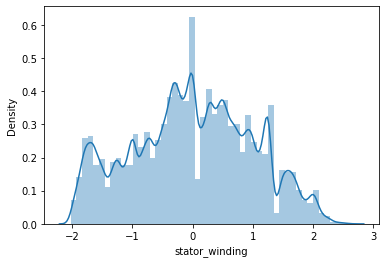

profile_id  :
Skew :  -0.6284123886037299  : 
Kurtosis :  -0.6526614359734477



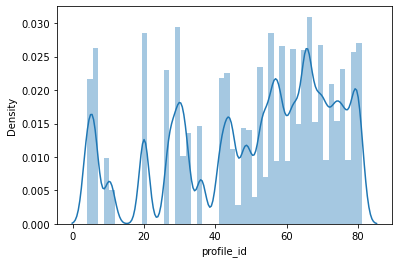

In [14]:
for i in tem.columns:
    print(i,' :\nSkew : ',tem[i].skew(),' : \nKurtosis : ',tem[i].kurt())
    print()
    
    plt.figure()
    sns.distplot(tem[i])
    plt.show()

In [15]:
tem.skew()

ambient          -0.848914
coolant           0.628247
u_d               0.194644
u_q               0.199885
motor_speed       0.333305
torque           -0.042660
i_d              -0.622578
i_q              -0.075705
pm               -0.232903
stator_yoke       0.257297
stator_tooth     -0.061533
stator_winding   -0.028055
profile_id       -0.628412
dtype: float64

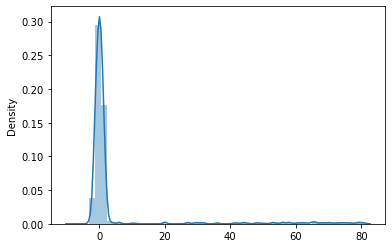

In [16]:
tem.kurtosis()
sns.distplot(tem); 

In [17]:
tem.profile_id.agg(['mean','median'])

mean      50.732001
median    56.000000
Name: profile_id, dtype: float64

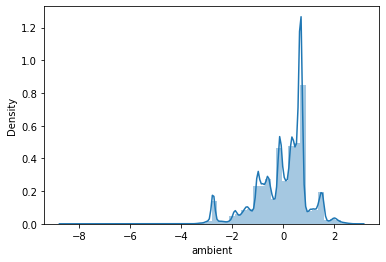

In [18]:
sns.distplot(tem['ambient']); 

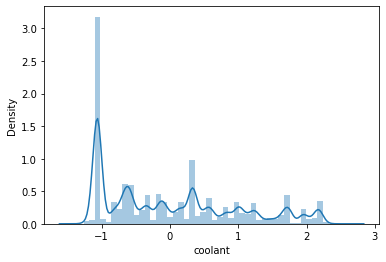

In [19]:
sns.distplot(tem['coolant']);

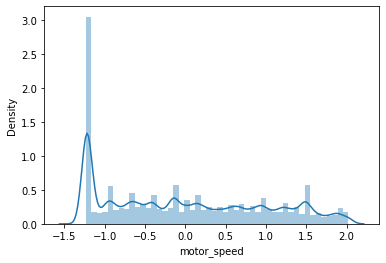

In [20]:
sns.distplot(tem['motor_speed']);

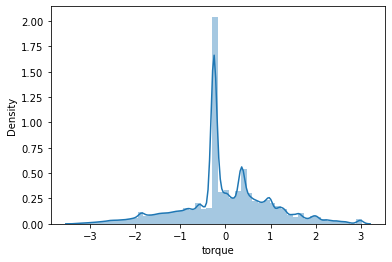

In [21]:
sns.distplot(tem['torque']);

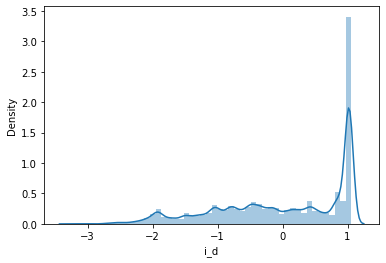

In [22]:
sns.distplot(tem['i_d']);

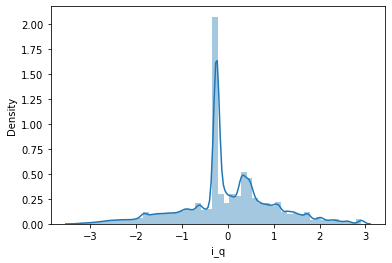

In [23]:
sns.distplot(tem['i_q']);

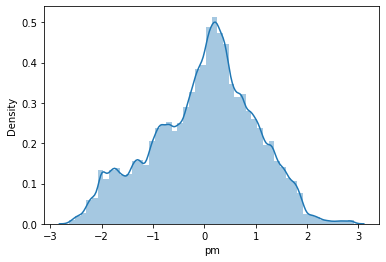

In [24]:
sns.distplot(tem['pm']);

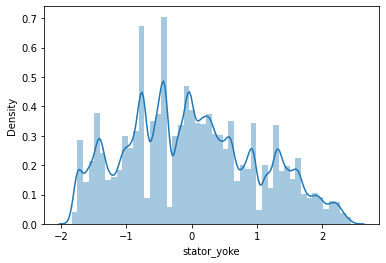

In [25]:
sns.distplot(tem['stator_yoke']);

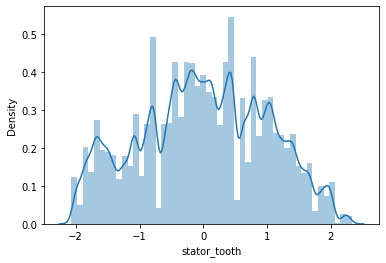

In [26]:
sns.distplot(tem['stator_tooth']);

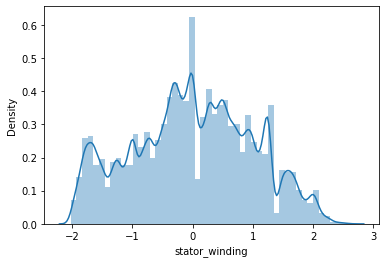

In [27]:
sns.distplot(tem['stator_winding']);

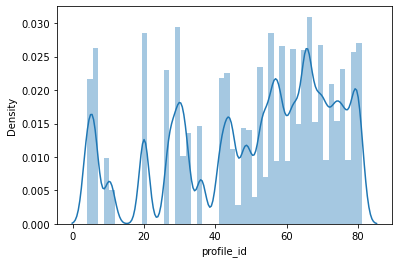

In [28]:
sns.distplot(tem['profile_id']);

In [12]:
maxquantile=tem['ambient'].quantile(0.98)
print("maximum quantile of ambient ",maxquantile)

maximum quantile of ambient  1.569566518


In [13]:
minquantile=tem['ambient'].quantile(0.05)
print("minimum quantile of ambient",minquantile)

minimum quantile of ambient -1.93117345


In [14]:
tem[tem['ambient']>maxquantile]

ambient   coolant       u_d       u_q  motor_speed    torque  \
48660   1.594710  1.012488 -1.161437  0.717287     1.483028  0.341026   
48661   1.708221  1.012685 -1.160878  0.714981     1.483027  0.341236   
48662   1.811454  1.012885 -1.160578  0.717571     1.483021  0.341236   
48663   1.898312  1.013206 -1.160441  0.717430     1.483022  0.340857   
48664   1.938490  1.013089 -1.161971  0.716106     1.483025  0.340200   
...          ...       ...       ...       ...          ...       ...   
850082  1.580535  0.580910 -0.407895  1.008676     0.882758  0.141011   
850083  1.571093  0.579555 -0.223923  1.222102     0.882804  0.028573   
850096  1.579878  0.572688  0.284056  1.098714     0.063295 -0.251910   
850097  1.580849  0.576063  0.288101  0.882166    -0.066095 -0.252967   
850098  1.571602  0.579278  0.291510  0.657581    -0.197150 -0.253725   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
48660  -0.997327  0.312320  1.796990     1.317551      1.406594   
48661  -0.998057  0.312355  1.797213     1.318172      1.406790   
48662  -0.995999  0.312441  1.797484     1.316769      1.407022   
48663  -0.995425  0.312206  1.797984     1.316114      1.407112   
48664  -0.995436  0.312523  1.797556     1.315326      1.405666   
...          ...       ...       ...          ...           ...   
850082 -0.399413  0.107453  1.818051     1.372643      1.840680   
850083 -0.212311  0.007352  1.816298     1.372662      1.840781   
850096  0.939680 -0.242240  1.805083     1.372581      1.837644   
850097  0.965099 -0.243230  1.804998     1.372618      1.836012   
850098  0.983215 -0.243949  1.804046     1.372644      1.835404   

        stator_winding  profile_id  
48660         1.261606           6  
48661         1.261606           6  
48662         1.261606           6  
48663         1.261606           6  
48664         1.261606           6  
...                ...         ...  
850082        2.028029          74  
850083        2.023309          74  
850096        2.000344          74  
850097        1.995777          74  
850098        1.991201          74  

[19962 rows x 13 columns]

In [15]:
tem[tem['ambient']<minquantile]

ambient   coolant       u_d       u_q  motor_speed    torque  \
36414  -3.698899 -1.288667 -1.126325  0.746681     1.483029  0.350814   
36415  -2.890745 -1.233934 -1.128157  0.746986     1.483026  0.350116   
36416  -2.312694 -1.194716 -1.129098  0.744399     1.483025  0.350904   
73810  -2.749857 -1.062121  0.332536 -1.276879    -1.222431 -0.243307   
73811  -2.749857 -1.063101  0.333189 -1.279757    -1.222427 -0.243990   
...          ...       ...       ...       ...          ...       ...   
989729 -5.239872 -1.078828  0.781064  1.368994     1.937356 -0.512008   
989730 -3.794825 -0.925217  0.789931  1.437498     1.919266 -0.509178   
989731 -2.759971 -0.814944  0.903029  1.432108     1.892712 -0.552516   
989732 -2.018466 -0.736669  1.036753  1.382309     1.868872 -0.609800   
991605 -2.488104 -0.793608 -1.220710  0.562819     1.442657  0.440879   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
36414  -1.078798  0.304409  0.142141    -0.702812     -0.224093   
36415  -1.076931  0.304828  0.141982    -0.711858     -0.223980   
36416  -1.077159  0.304613  0.141863    -0.707189     -0.223984   
73810   1.029137 -0.245723 -2.523518    -1.821232     -2.059317   
73811   1.029156 -0.245716 -2.523157    -1.820785     -2.059384   
...          ...       ...       ...          ...           ...   
989729 -0.865224 -0.484981  0.375969    -0.734718     -0.761952   
989730 -0.816840 -0.484278  0.375834    -0.734720     -0.761952   
989731 -0.805990 -0.524457  0.375869    -0.734721     -0.761952   
989732 -0.822361 -0.576429  0.373749    -0.734360     -0.761951   
991605 -1.223388  0.363868 -0.416796    -1.057087     -1.270748   

        stator_winding  profile_id  
36414         0.016168           6  
36415         0.016681           6  
36416         0.017049           6  
73810        -2.004226          10  
73811        -2.003720          10  
...                ...         ...  
989729       -0.719982          72  
989730       -0.716570          72  
989731       -0.714213          72  
989732       -0.711750          72  
991605       -1.311594          72  

[49904 rows x 13 columns]

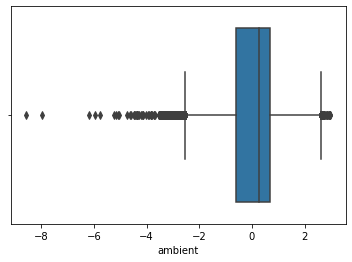

In [16]:
sns.boxplot(tem['ambient']);

# outliers removing 

In [17]:
tem1=tem[(tem['ambient']<maxquantile) & (tem['ambient']>minquantile)]

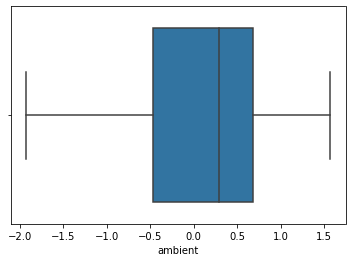

In [18]:
sns.boxplot(tem1['ambient']);

In [19]:
maxquantile=tem['coolant'].quantile(0.99)
print("maximum quantile of coolant ",maxquantile)

maximum quantile of coolant  2.1802857


In [20]:
minquantile=tem['coolant'].quantile(0.03)
print("minimum quantile of coolant",minquantile)

minimum quantile of coolant -1.0879437299999999


In [21]:
maxquantile=tem['u_d'].quantile(0.99)
print("maximum quantile of Voltage d-component ",maxquantile)  

maximum quantile of Voltage d-component  2.1867757


In [22]:
minquantile=tem['u_d'].quantile(0.03)
print("minimum quantile of Voltage d-component",minquantile)

minimum quantile of Voltage d-component -1.611805579


In [23]:
maxquantile=tem['u_q'].quantile(0.99)
print("maximum quantile of Voltage q-component ",maxquantile)

maximum quantile of Voltage q-component  1.74586942


In [24]:
minquantile=tem['u_q'].quantile(0.03)
print("minimum quantile of Voltage q-component",minquantile)

minimum quantile of Voltage q-component -1.324504379


In [25]:
maxquantile=tem['motor_speed'].quantile(0.99)
print("maximum quantile of motor speed ",maxquantile)

maximum quantile of motor speed  2.0078921


In [26]:
minquantile=tem['motor_speed'].quantile(0.03)
print("minimum quantile of motor speed",minquantile)

minimum quantile of motor speed -1.2224321


In [27]:
maxquantile=tem['torque'].quantile(0.99)
print("maximum quantile of torque  ",maxquantile)

maximum quantile of torque   2.5655143


In [28]:
minquantile=tem['torque'].quantile(0.03)
print("minimum quantile of torque",minquantile)

minimum quantile of torque -2.079973877


In [29]:
maxquantile=tem['i_d'].quantile(0.99)
print("maximum quantile of Current d-component  ",maxquantile)

maximum quantile of Current d-component   1.0291919


In [30]:
minquantile=tem['i_d'].quantile(0.03)
print("minimum quantile of Current d-component",minquantile)

minimum quantile of Current d-component -2.002100832


In [31]:
maxquantile=tem['i_q'].quantile(0.99)
print("maximum quantile of Current q-component  ",maxquantile)

maximum quantile of Current q-component   2.5736987869999957


In [32]:
minquantile=tem['i_q'].quantile(0.03)
print("minimum quantile of Current q-component",minquantile)

minimum quantile of Current q-component -2.1146649959999997


In [33]:
maxquantile=tem['pm'].quantile(0.99)
print("maximum quantile of Permanent Magnet surface temperature   ",maxquantile)

maximum quantile of Permanent Magnet surface temperature    2.000968372999993


In [34]:
minquantile=tem['pm'].quantile(0.03)
print("minimum quantile of Permanent Magnet surface temperature ",minquantile)

minimum quantile of Permanent Magnet surface temperature  -1.995768865


In [35]:
maxquantile=tem['stator_yoke'].quantile(0.99)
print("maximum quantile of  Stator yoke temperature    ",maxquantile)

maximum quantile of  Stator yoke temperature     2.217254586


In [36]:
minquantile=tem['stator_yoke'].quantile(0.03)
print("minimum quantile of  Stator yoke temperature  ",minquantile)

minimum quantile of  Stator yoke temperature   -1.659249051


In [37]:
maxquantile=tem['stator_tooth'].quantile(0.99)
print("maximum quantile of  Stator tooth temperature    ",maxquantile)

maximum quantile of  Stator tooth temperature     1.9916204


In [38]:
minquantile=tem['stator_tooth'].quantile(0.03)
print("minimum quantile of  Stator tooth  temperature  ",minquantile)

minimum quantile of  Stator tooth  temperature   -1.821431909


In [39]:
maxquantile=tem['stator_winding'].quantile(0.99)
print("maximum quantile of  Stator winding temperature ",maxquantile)

maximum quantile of  Stator winding temperature  2.0291185499999997


In [40]:
minquantile=tem['stator_winding'].quantile(0.03)
print("minimum quantile of  Stator winding  temperature  ",minquantile)

minimum quantile of  Stator winding  temperature   -1.7833699859999999


In [41]:
maxquantile=tem['profile_id'].quantile(0.99)
print("maximum quantile of  profile_id ",maxquantile)

maximum quantile of  profile_id  81.0


In [42]:
minquantile=tem['profile_id'].quantile(0.03)
print(" maximum quantile of profile_id  ",minquantile)

 maximum quantile of profile_id   4.0


In [43]:
tem['ambient'].describe()

count    998070.000000
mean         -0.003905
std           0.993127
min          -8.573954
25%          -0.599385
50%           0.266157
75%           0.686675
max           2.967117
Name: ambient, dtype: float64

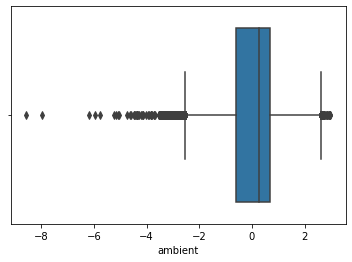

In [44]:
sns.boxplot(tem['ambient']);

# Finding and Removing Outliers

In [45]:
#  percentile25 =tem['ambient'].quantile(0.25)
Q1 = tem.quantile(0.25)
Q3 = tem.quantile(0.75)
IQR = Q3 - Q1
((tem < (Q1 - 1.5 * IQR)) |(tem > (Q3 + 1.5 * IQR))).sum()

ambient            38492
coolant                0
u_d                18050
u_q                    0
motor_speed            0
torque            127303
i_d                    0
i_q               148535
pm                  1501
stator_yoke            0
stator_tooth           0
stator_winding         0
profile_id             0
dtype: int64

In [46]:
newdf = tem[~((tem < (Q1 - 1.5 * IQR)) |(tem > (Q3 + 1.5 * IQR))).any(axis=1)]
newdf.shape

(814996, 13)

In [47]:
newdf.describe()

ambient        coolant            u_d            u_q  \
count  814996.000000  814996.000000  814996.000000  814996.000000   
mean        0.074327       0.043378      -0.108752       0.073228   
std         0.842397       1.020929       0.880459       1.062721   
min        -2.528432      -1.326642      -1.654878      -1.692953   
25%        -0.549461      -1.034215      -0.872168      -1.167716   
50%         0.269779      -0.131247       0.240986       0.082905   
75%         0.686956       0.838960       0.342796       0.960540   
max         2.615644       2.297432       2.135743       1.793498   

         motor_speed         torque            i_d            i_q  \
count  814996.000000  814996.000000  814996.000000  814996.000000   
mean        0.057953       0.055707       0.112811       0.057467   
std         1.056624       0.637751       0.994801       0.635833   
min        -1.371529      -1.488004      -3.109984      -1.392057   
25%        -1.141301      -0.255640      -0.643348      -0.245732   
50%        -0.004975      -0.185800       0.453488      -0.176573   
75%         0.997569       0.464114       1.029133       0.481189   
max         2.024164       1.768235       1.060255       1.633992   

                  pm    stator_yoke   stator_tooth  stator_winding  \
count  814996.000000  814996.000000  814996.000000   814996.000000   
mean        0.045887      -0.005105      -0.038661       -0.082340   
std         0.956329       1.004616       0.990678        0.967570   
min        -2.628648      -1.834688      -2.066143       -2.019973   
25%        -0.602911      -0.770572      -0.778084       -0.791304   
50%         0.111043      -0.057719      -0.033528       -0.078244   
75%         0.701153       0.674934       0.769904        0.626848   
max         2.710098       2.449158       2.326668        2.573466   

          profile_id  
count  814996.000000  
mean       50.858718  
std        22.774148  
min         4.000000  
25%        31.000000  
50%        57.000000  
75%        69.000000  
max        81.000000

In [48]:
corr=newdf.corr()
corr

ambient   coolant       u_d       u_q  motor_speed    torque  \
ambient         1.000000  0.399480  0.147875  0.070383     0.034122 -0.161160   
coolant         0.399480  1.000000  0.178951  0.013726    -0.056116 -0.179571   
u_d             0.147875  0.178951  1.000000 -0.012887    -0.309555 -0.886515   
u_q             0.070383  0.013726 -0.012887  1.000000     0.725273 -0.055580   
motor_speed     0.034122 -0.056116 -0.309555  0.725273     1.000000  0.107290   
torque         -0.161160 -0.179571 -0.886515 -0.055580     0.107290  1.000000   
i_d             0.016085  0.111160  0.538459 -0.282381    -0.821602 -0.392887   
i_q            -0.162920 -0.174933 -0.845703 -0.038319     0.070620  0.992615   
pm              0.394973  0.388552 -0.173839  0.091586     0.328285  0.066255   
stator_yoke     0.415292  0.882587 -0.009800  0.128812     0.196167 -0.033613   
stator_tooth    0.363603  0.702237 -0.153375  0.198203     0.378149  0.075373   
stator_winding  0.290629  0.537764 -0.263108  0.203841     0.475515  0.173067   
profile_id      0.370495  0.487998  0.314603 -0.137591    -0.189148 -0.276421   

                     i_d       i_q        pm  stator_yoke  stator_tooth  \
ambient         0.016085 -0.162920  0.394973     0.415292      0.363603   
coolant         0.111160 -0.174933  0.388552     0.882587      0.702237   
u_d             0.538459 -0.845703 -0.173839    -0.009800     -0.153375   
u_q            -0.282381 -0.038319  0.091586     0.128812      0.198203   
motor_speed    -0.821602  0.070620  0.328285     0.196167      0.378149   
torque         -0.392887  0.992615  0.066255    -0.033613      0.075373   
i_d             1.000000 -0.327846 -0.353362    -0.175287     -0.387453   
i_q            -0.327846  1.000000  0.038836    -0.045427      0.050860   
pm             -0.353362  0.038836  1.000000     0.680281      0.781660   
stator_yoke    -0.175287 -0.045427  0.680281     1.000000      0.950128   
stator_tooth   -0.387453  0.050860  0.781660     0.950128      1.000000   
stator_winding -0.534230  0.138921  0.783877     0.855460      0.971520   
profile_id      0.167090 -0.274789  0.113198     0.390430      0.274817   

                stator_winding  profile_id  
ambient               0.290629    0.370495  
coolant               0.537764    0.487998  
u_d                  -0.263108    0.314603  
u_q                   0.203841   -0.137591  
motor_speed           0.475515   -0.189148  
torque                0.173067   -0.276421  
i_d                  -0.534230    0.167090  
i_q                   0.138921   -0.274789  
pm                    0.783877    0.113198  
stator_yoke           0.855460    0.390430  
stator_tooth          0.971520    0.274817  
stator_winding        1.000000    0.183474  
profile_id            0.183474    1.000000

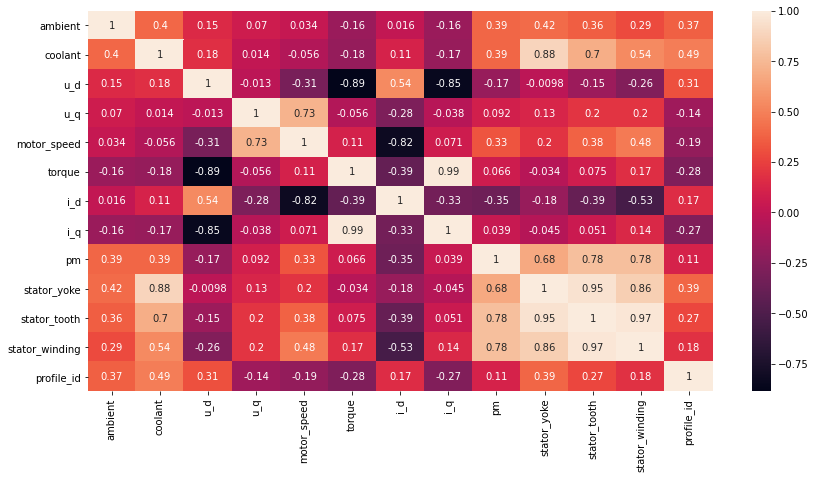

In [49]:
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True);

In [50]:
df=tem.drop(['profile_id'],axis=1)

In [51]:
df

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  
0            -2.018033  
1            -2.017631  
2            -2.017343  
3            -2.017632  
4            -2.018145  
...                ...  
998065        0.494725  
998066        0.494279  
998067        0.492666  
998068        0.490581  
998069        0.489382  

[998070 rows x 12 columns]

# EDA

In [52]:
df.shape # after removing the profileid the data look like this 

(998070, 12)

In [53]:
df.dtypes # DAta type of each coloumns, All the data types are numerical 

ambient           float64
coolant           float64
u_d               float64
u_q               float64
motor_speed       float64
torque            float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
stator_tooth      float64
stator_winding    float64
dtype: object

In [71]:
df.corr()['motor_speed'] # data corelation with motor_speed 

ambient           0.078283
coolant          -0.033332
u_d              -0.233828
u_q               0.716897
motor_speed       1.000000
torque            0.024517
i_d              -0.722914
i_q               0.006323
pm                0.332419
stator_yoke       0.182564
stator_tooth      0.333909
stator_winding    0.393154
Name: motor_speed, dtype: float64

In [72]:
df.corr()

ambient   coolant       u_d       u_q  motor_speed    torque  \
ambient         1.000000  0.434435  0.194754  0.087430     0.078283 -0.262264   
coolant         0.434435  1.000000  0.178708  0.027851    -0.033332 -0.189617   
u_d             0.194754  0.178708  1.000000 -0.027472    -0.233828 -0.821325   
u_q             0.087430  0.027851 -0.027472  1.000000     0.716897 -0.037262   
motor_speed     0.078283 -0.033332 -0.233828  0.716897     1.000000  0.024517   
torque         -0.262264 -0.189617 -0.821325 -0.037262     0.024517  1.000000   
i_d             0.005605  0.108489  0.358517 -0.181855    -0.722914 -0.239059   
i_q            -0.260562 -0.186060 -0.796586 -0.026348     0.006323  0.996560   
pm              0.501496  0.430548 -0.082564  0.101236     0.332419 -0.072905   
stator_yoke     0.451616  0.874037  0.041428  0.106186     0.182564 -0.092207   
stator_tooth    0.396742  0.689003 -0.066256  0.149017     0.333909 -0.011055   
stator_winding  0.301883  0.509298 -0.150714  0.125445     0.393154  0.080981   

                     i_d       i_q        pm  stator_yoke  stator_tooth  \
ambient         0.005605 -0.260562  0.501496     0.451616      0.396742   
coolant         0.108489 -0.186060  0.430548     0.874037      0.689003   
u_d             0.358517 -0.796586 -0.082564     0.041428     -0.066256   
u_q            -0.181855 -0.026348  0.101236     0.106186      0.149017   
motor_speed    -0.722914  0.006323  0.332419     0.182564      0.333909   
torque         -0.239059  0.996560 -0.072905    -0.092207     -0.011055   
i_d             1.000000 -0.204230 -0.299227    -0.179903     -0.387712   
i_q            -0.204230  1.000000 -0.086486    -0.098753     -0.025191   
pm             -0.299227 -0.086486  1.000000     0.695014      0.768352   
stator_yoke    -0.179903 -0.098753  0.695014     1.000000      0.949898   
stator_tooth   -0.387712 -0.025191  0.768352     0.949898      1.000000   
stator_winding -0.539924  0.060949  0.729561     0.845144      0.965633   

                stator_winding  
ambient               0.301883  
coolant               0.509298  
u_d                  -0.150714  
u_q                   0.125445  
motor_speed           0.393154  
torque                0.080981  
i_d                  -0.539924  
i_q                   0.060949  
pm                    0.729561  
stator_yoke           0.845144  
stator_tooth          0.965633  
stator_winding        1.000000

In [73]:
corr1=df.corr()
corr1

ambient   coolant       u_d       u_q  motor_speed    torque  \
ambient         1.000000  0.434435  0.194754  0.087430     0.078283 -0.262264   
coolant         0.434435  1.000000  0.178708  0.027851    -0.033332 -0.189617   
u_d             0.194754  0.178708  1.000000 -0.027472    -0.233828 -0.821325   
u_q             0.087430  0.027851 -0.027472  1.000000     0.716897 -0.037262   
motor_speed     0.078283 -0.033332 -0.233828  0.716897     1.000000  0.024517   
torque         -0.262264 -0.189617 -0.821325 -0.037262     0.024517  1.000000   
i_d             0.005605  0.108489  0.358517 -0.181855    -0.722914 -0.239059   
i_q            -0.260562 -0.186060 -0.796586 -0.026348     0.006323  0.996560   
pm              0.501496  0.430548 -0.082564  0.101236     0.332419 -0.072905   
stator_yoke     0.451616  0.874037  0.041428  0.106186     0.182564 -0.092207   
stator_tooth    0.396742  0.689003 -0.066256  0.149017     0.333909 -0.011055   
stator_winding  0.301883  0.509298 -0.150714  0.125445     0.393154  0.080981   

                     i_d       i_q        pm  stator_yoke  stator_tooth  \
ambient         0.005605 -0.260562  0.501496     0.451616      0.396742   
coolant         0.108489 -0.186060  0.430548     0.874037      0.689003   
u_d             0.358517 -0.796586 -0.082564     0.041428     -0.066256   
u_q            -0.181855 -0.026348  0.101236     0.106186      0.149017   
motor_speed    -0.722914  0.006323  0.332419     0.182564      0.333909   
torque         -0.239059  0.996560 -0.072905    -0.092207     -0.011055   
i_d             1.000000 -0.204230 -0.299227    -0.179903     -0.387712   
i_q            -0.204230  1.000000 -0.086486    -0.098753     -0.025191   
pm             -0.299227 -0.086486  1.000000     0.695014      0.768352   
stator_yoke    -0.179903 -0.098753  0.695014     1.000000      0.949898   
stator_tooth   -0.387712 -0.025191  0.768352     0.949898      1.000000   
stator_winding -0.539924  0.060949  0.729561     0.845144      0.965633   

                stator_winding  
ambient               0.301883  
coolant               0.509298  
u_d                  -0.150714  
u_q                   0.125445  
motor_speed           0.393154  
torque                0.080981  
i_d                  -0.539924  
i_q                   0.060949  
pm                    0.729561  
stator_yoke           0.845144  
stator_tooth          0.965633  
stator_winding        1.000000

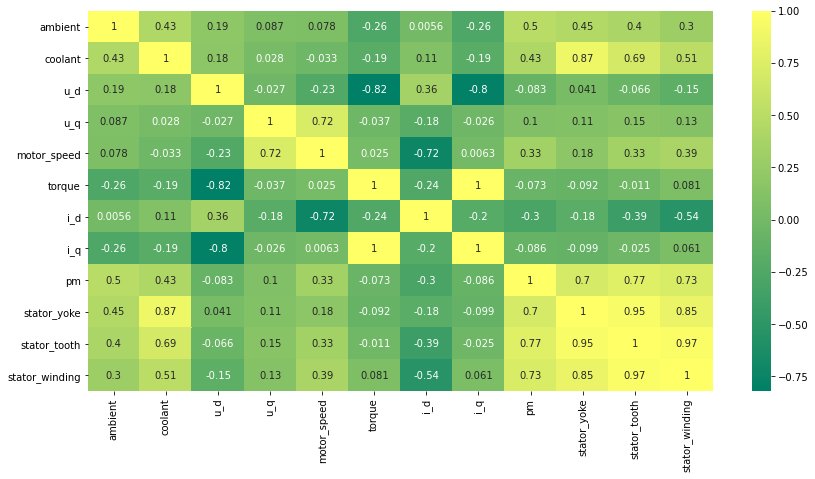

In [82]:
plt.figure(figsize=(14,7))
sns.heatmap(corr1,cmap='summer',annot=True); 

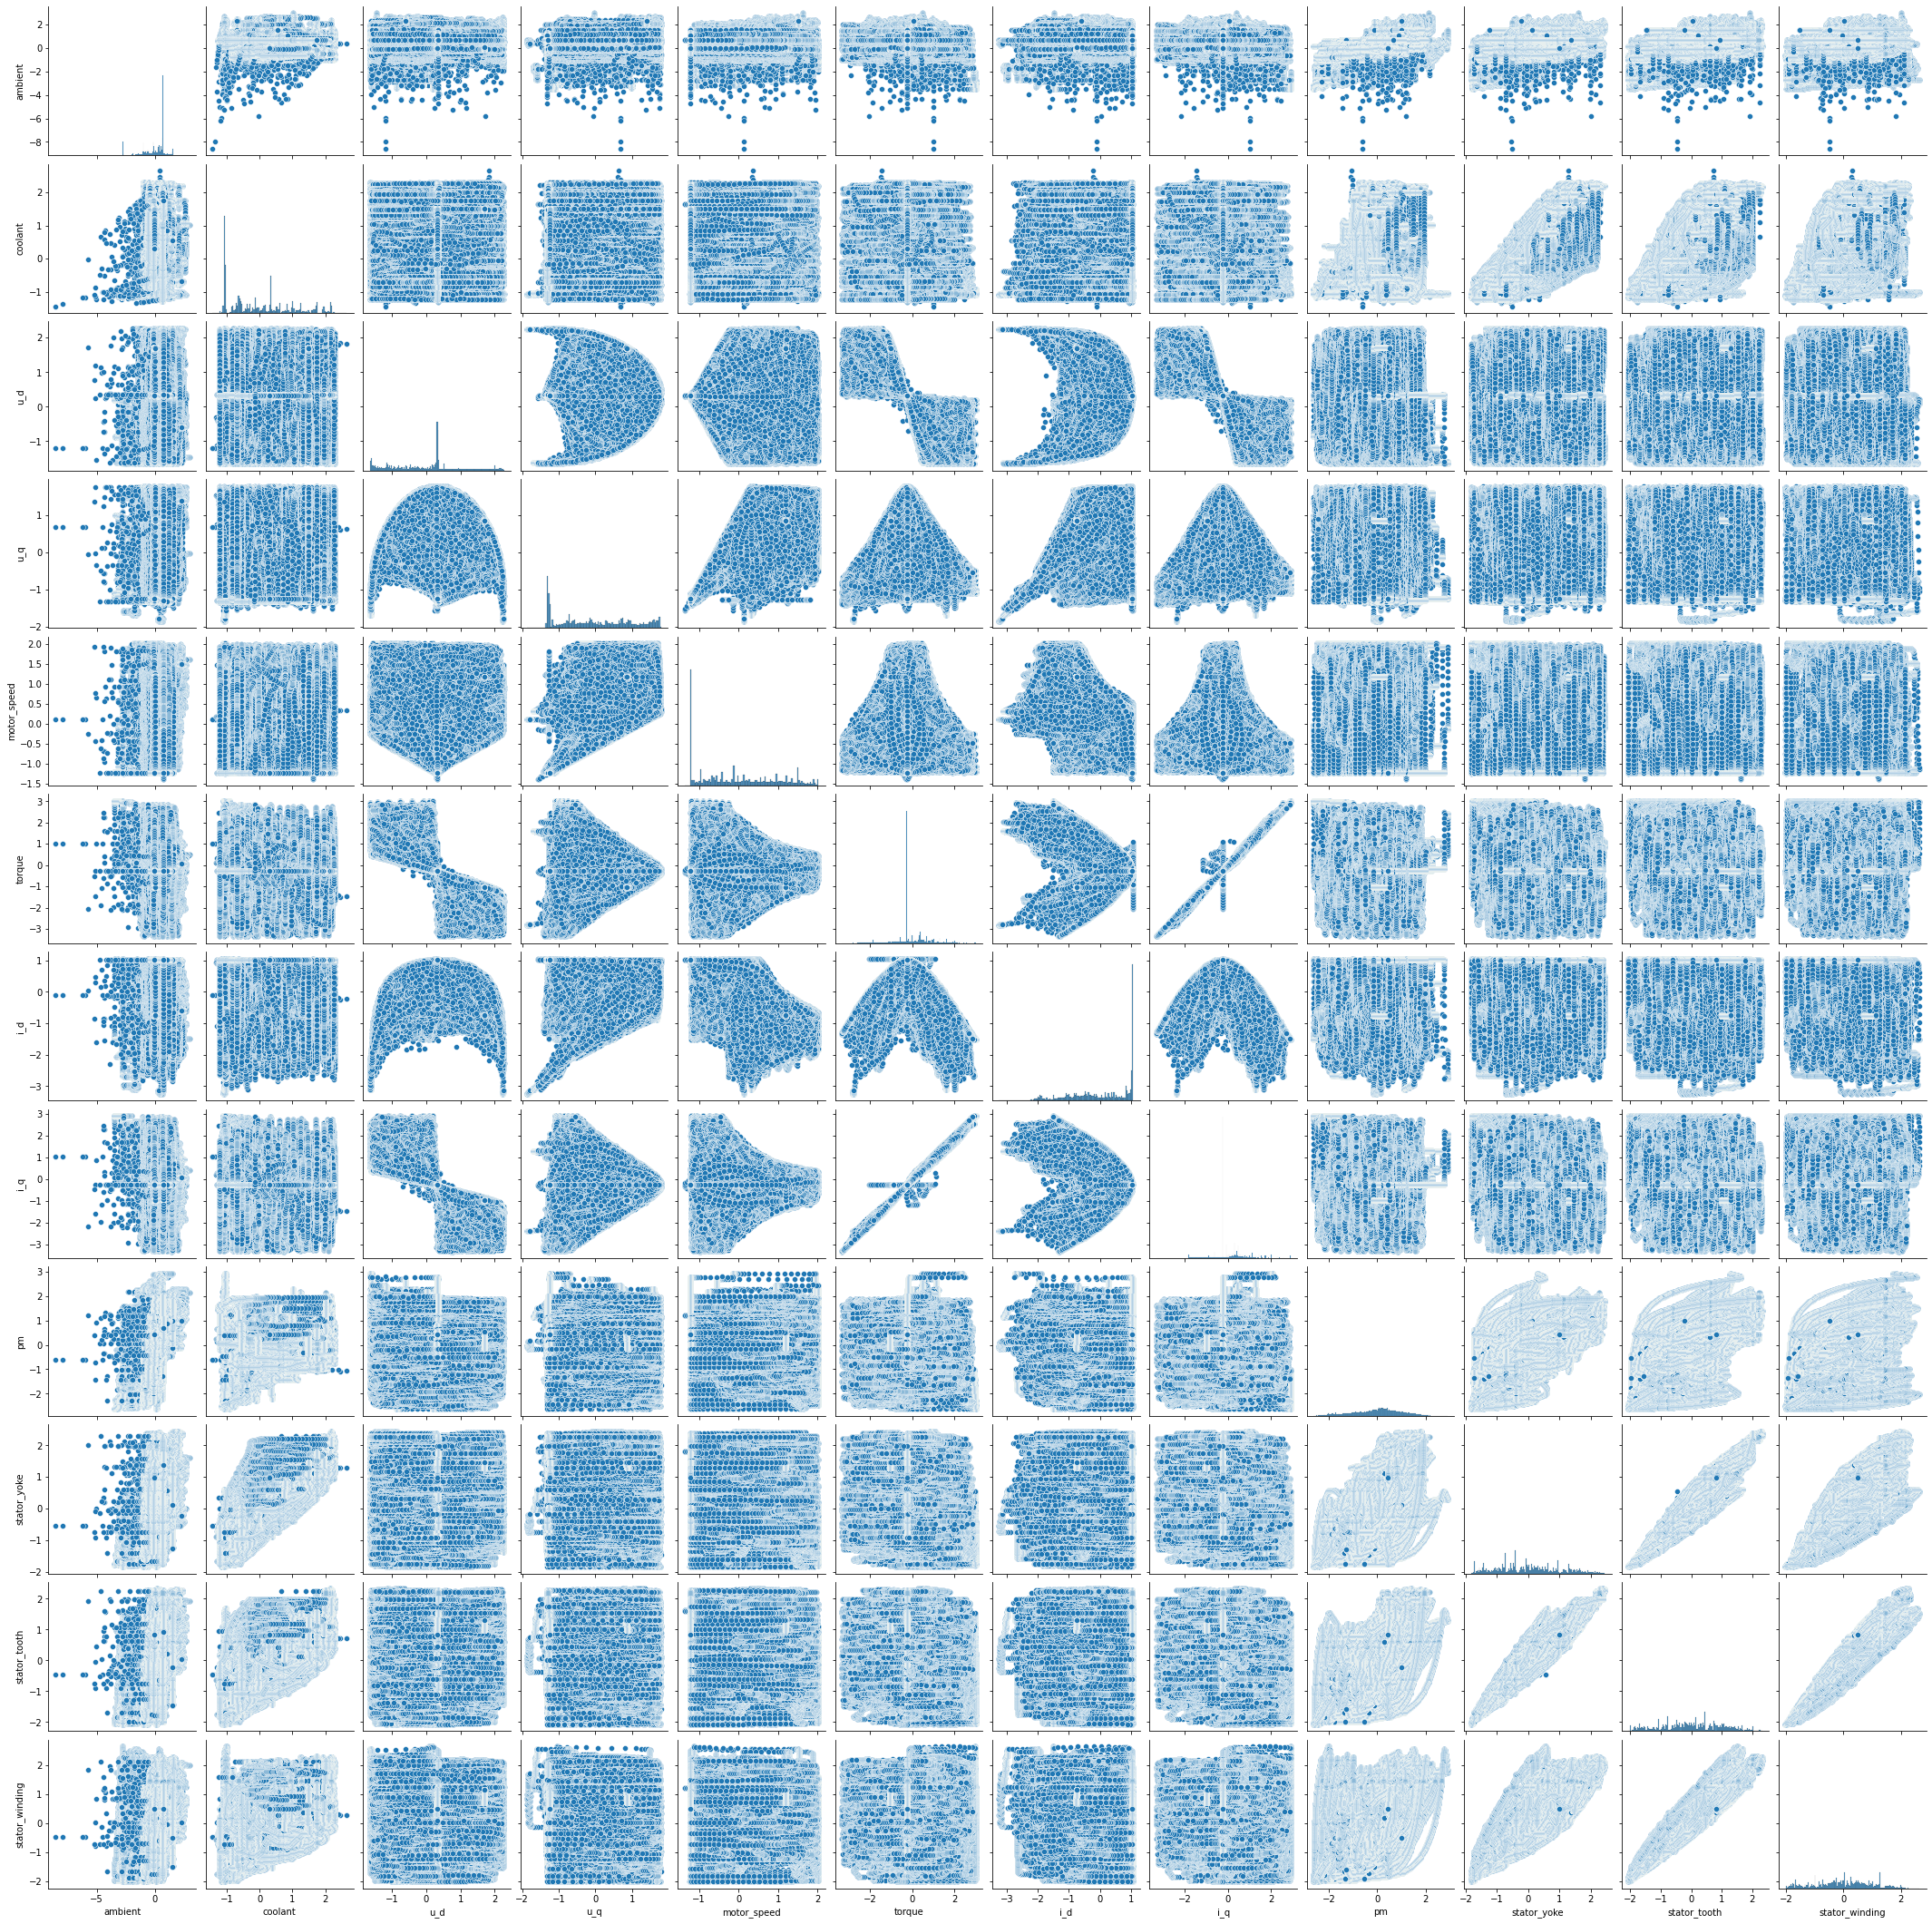

In [84]:
sns.pairplot(df)
plt.show();

In [74]:
df

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  
0            -2.018033  
1            -2.017631  
2            -2.017343  
3            -2.017632  
4            -2.018145  
...                ...  
998065        0.494725  
998066        0.494279  
998067        0.492666  
998068        0.490581  
998069        0.489382  

[998070 rows x 12 columns]

# Feature Extraction 

In [54]:
x=df[['ambient','coolant','u_d','u_q','motor_speed','torque','i_d','i_q','stator_yoke','stator_tooth','stator_winding']]

In [55]:
x

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q  stator_yoke  stator_tooth  stator_winding  
0       1.029572 -0.245860    -1.831422     -2.066143       -2.018033  
1       1.029509 -0.245832    -1.830969     -2.064859       -2.017631  
2       1.029448 -0.245818    -1.830400     -2.064073       -2.017343  
3       1.032845 -0.246955    -1.830333     -2.063137       -2.017632  
4       1.031807 -0.246610    -1.830498     -2.062795       -2.018145  
...          ...       ...          ...           ...             ...  
998065  1.029142 -0.245723     1.018568      0.836084        0.494725  
998066  1.029148 -0.245736     1.013416      0.834438        0.494279  
998067  1.029191 -0.245701     1.002906      0.833936        0.492666  
998068  1.029147 -0.245727     0.999157      0.830504        0.490581  
998069  1.029141 -0.245722     0.987163      0.828046        0.489382  

[998070 rows x 11 columns]

In [57]:
y= df['pm']

In [58]:
y

0        -2.522071
1        -2.522418
2        -2.522673
3        -2.521639
4        -2.521900
            ...   
998065    0.429853
998066    0.429751
998067    0.429439
998068    0.429558
998069    0.429166
Name: pm, Length: 998070, dtype: float64

In [59]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.5,random_state=0)

# Regression 

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train,y_train)

LinearRegression()

In [62]:
print ("R^2 Score",(model.score(X_test,y_test)))

R^2 Score 0.7719381284583652


In [63]:
print ("Mean Absoulue Error ",mean_absolute_error(X_test,X_train))

Mean Absoulue Error  1.1196628849377286


In [64]:
print("Mean Square Error ",mean_squared_error(X_test,X_train))

Mean Square Error  1.9965160118976926


In [65]:
print("Mean Square Error ",mean_squared_error(y_test,y_train))

Mean Square Error  1.9773950487440366


# Decision Tree